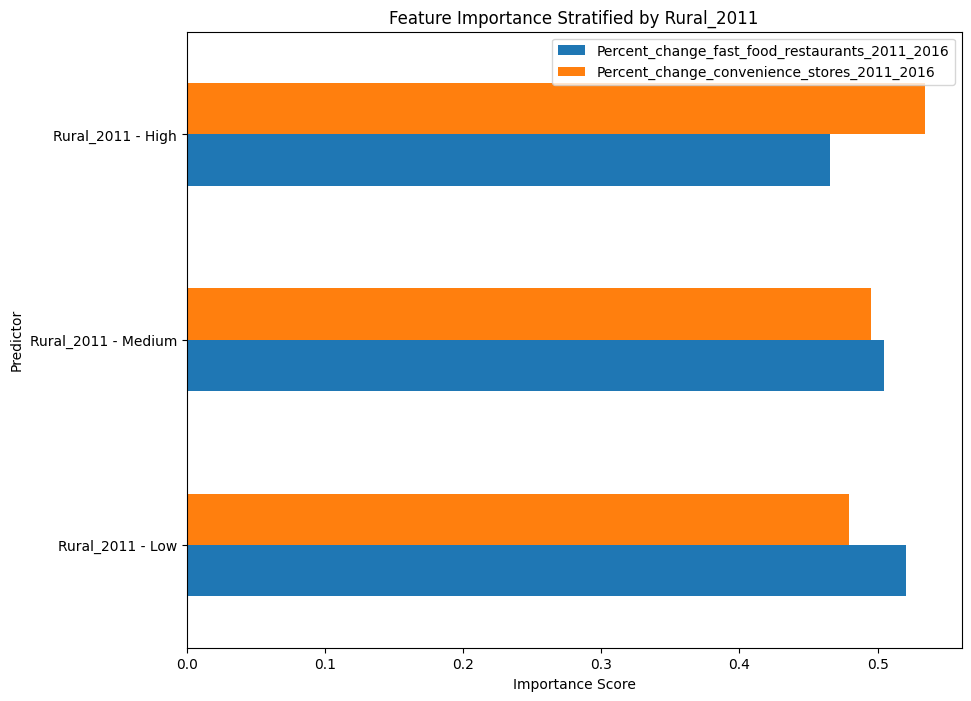

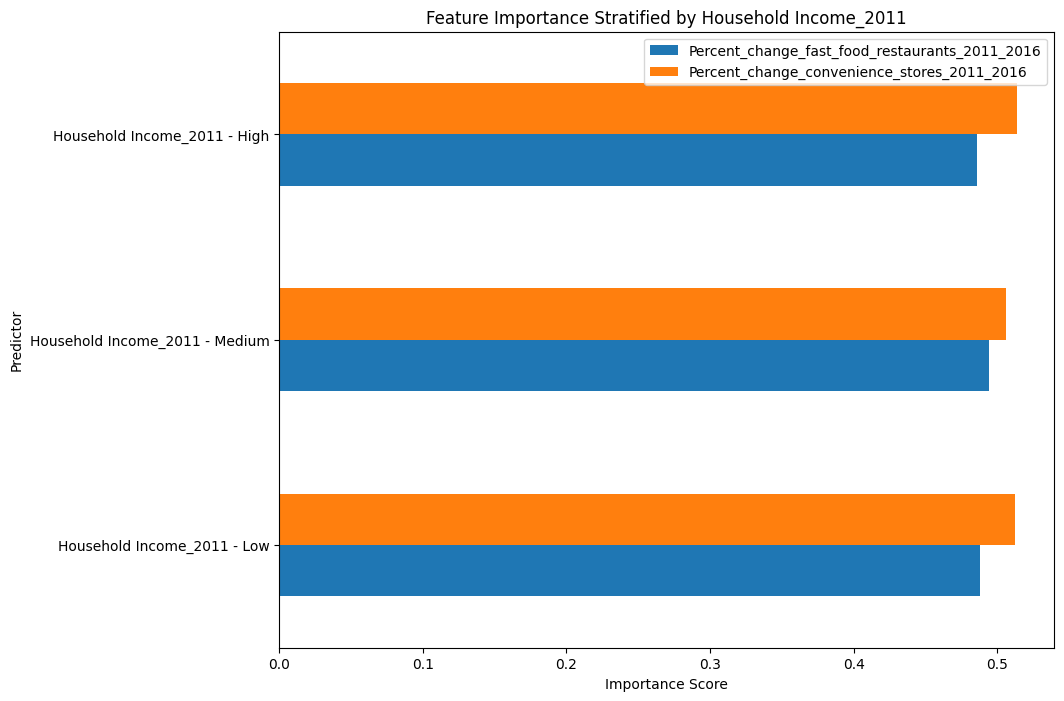

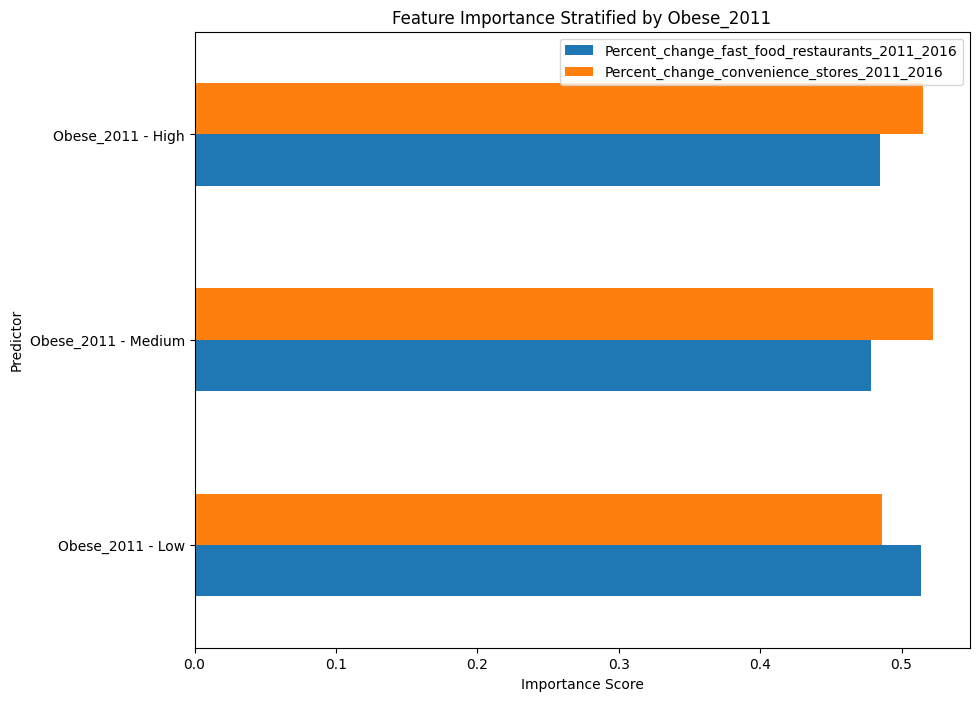

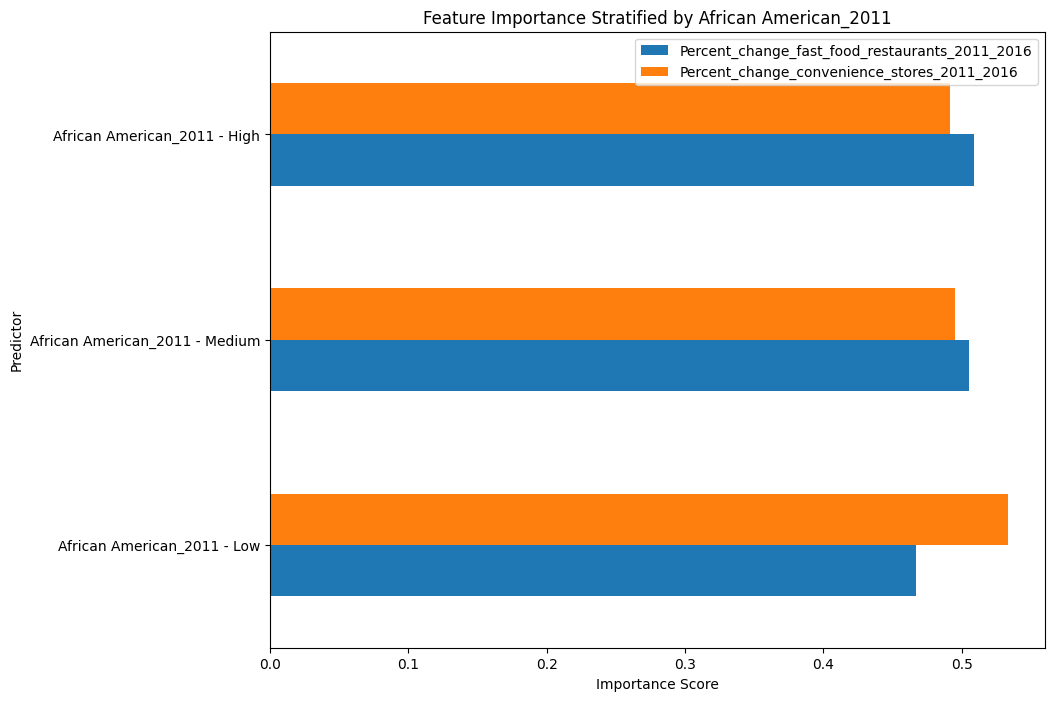

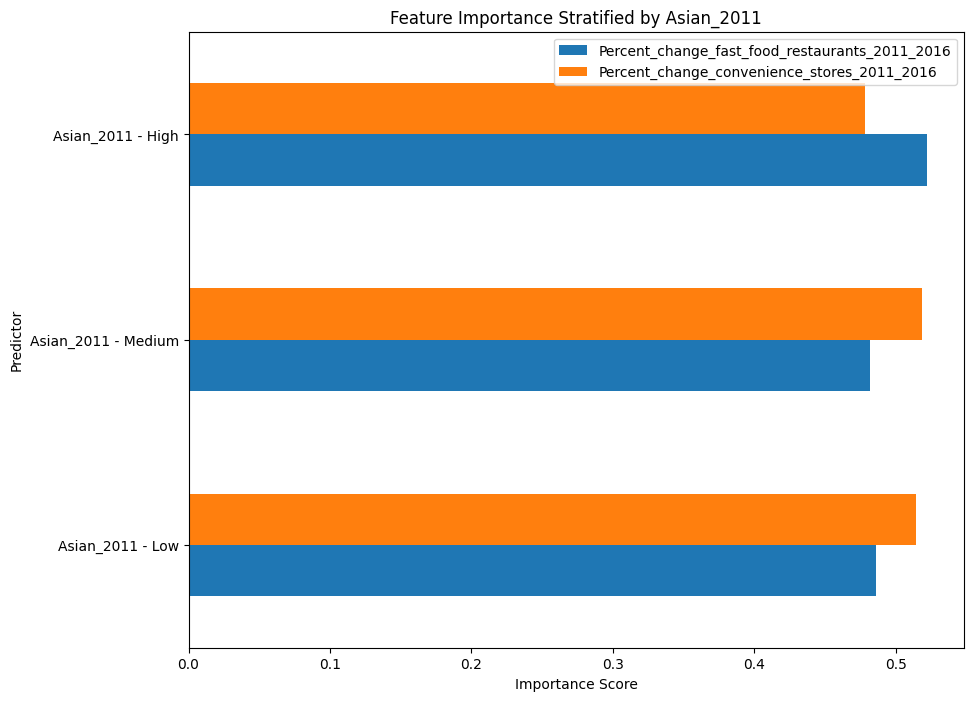

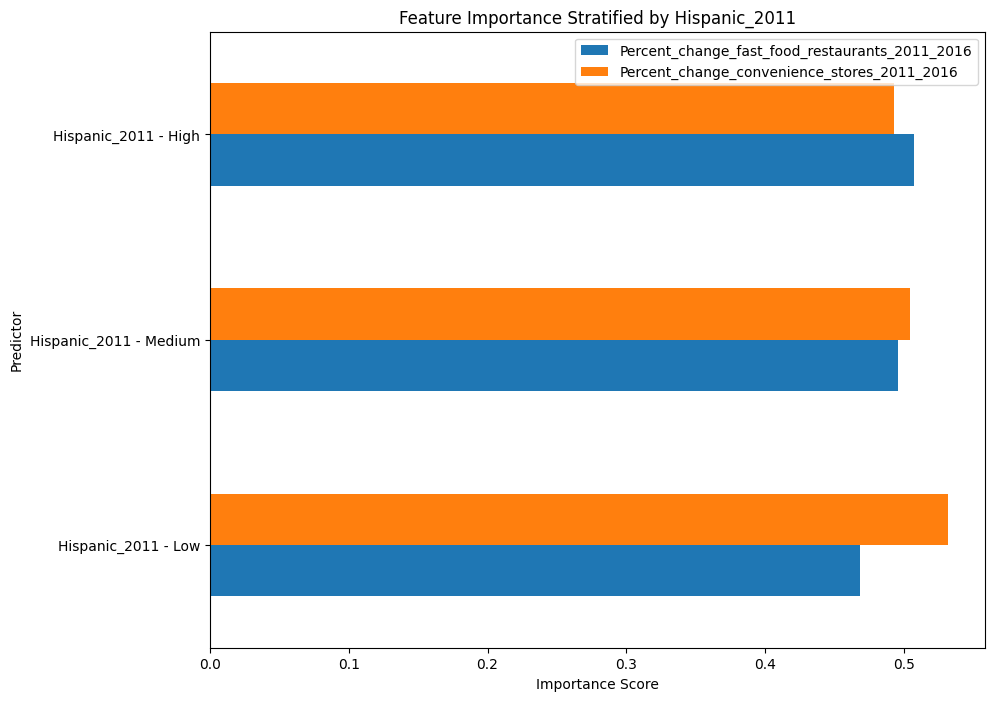

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data from CSV
cleaned_data = pd.read_csv('merged_regression_data.csv')

# Define environmental features
environmental_features = [
    'Rural_2011', 
    'Household Income_2011', 
    'Obese_2011', 
    'African American_2011', 
    'Asian_2011', 
    'Hispanic_2011'
]

# Define key predictors (focus of the analysis)
key_predictors = [
    'Percent_change_fast_food_restaurants_2011_2016',
    'Percent_change_convenience_stores_2011_2016'
]

# Function to train and return feature importances
def train_and_get_importance(X, y, predictors):
    # Drop rows with NaN in y
    valid_idx = ~y.isna()
    X = X[valid_idx]
    y = y[valid_idx]
    
    if len(X) == 0 or len(y) == 0:  # Check if the bin is empty
        return pd.Series([0] * len(predictors), index=predictors)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X[predictors], y)
    return pd.Series(rf_model.feature_importances_, index=predictors)

# Stratify data by each environmental feature
for feature in environmental_features:
    # Create 3 bins based on quantiles for stratification
    bins = pd.qcut(cleaned_data[feature], q=3, labels=["Low", "Medium", "High"])
    cleaned_data[f'{feature}_bin'] = bins
    
    # Collect feature importances for each bin
    importances = []
    for label in ["Low", "Medium", "High"]:
        bin_data = cleaned_data[cleaned_data[f'{feature}_bin'] == label]
        
        # Define predictors and target
        X = bin_data[key_predictors]
        y = bin_data['change_fair_poor_health']
        
        # Calculate feature importances
        importance = train_and_get_importance(X, y, key_predictors)
        importances.append(importance)
    
    # Visualize the importance differences for the feature
    importance_df = pd.DataFrame(importances, index=[f'{feature} - {label}' for label in ["Low", "Medium", "High"]])
    importance_df.plot(kind='barh', title=f'Feature Importance Stratified by {feature}', figsize=(10, 8))
    plt.xlabel('Importance Score')
    plt.ylabel('Predictor')
    plt.show()
